# Car Price Predictor - EDA
### Siraj Ali

**Dataset Location**: https://www.kaggle.com/CooperUnion/cardataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in the dataset, and preview the data

In [15]:
df_raw = pd.read_csv('./data.csv')
print(df_raw.shape)

(11914, 16)


In [16]:
df_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
df_raw.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Drop duplicates and look at null counts

In [18]:
dups = df_raw[df_raw.duplicated()]
print(dups.shape)

(715, 16)


In [19]:
df = df_raw.drop_duplicates()
print(df.shape)

(11199, 16)


In [20]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Look at the distribution of price (`MSRP`), which will be the target of the model.

In [21]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


We can see that the distribution of MSRP is heavily right skewed. There are a few cars in our dataset that have a very high MSRP. Notably, the Bugatti that costs $2 million!

<AxesSubplot:>

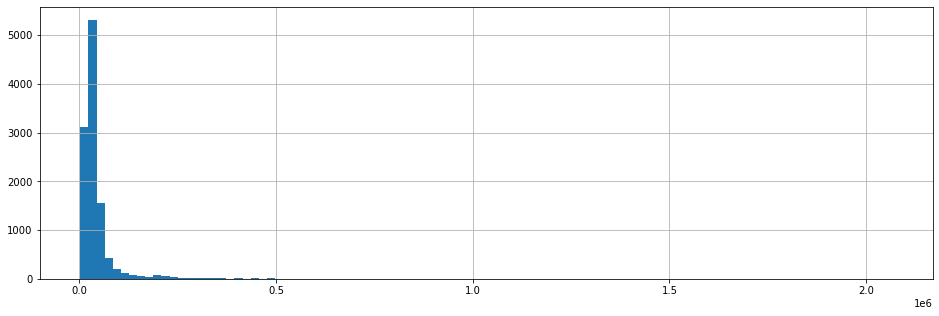

In [55]:
df['MSRP'].hist(bins=100, figsize=(16, 5))

Cutting off cars that cost more than $250k, we can better get a picture of the data:
* There are over 1200 cars that have a very low price (it turns out to be 2000 dollars)
* MSRP has a log-normal distribution

<AxesSubplot:>

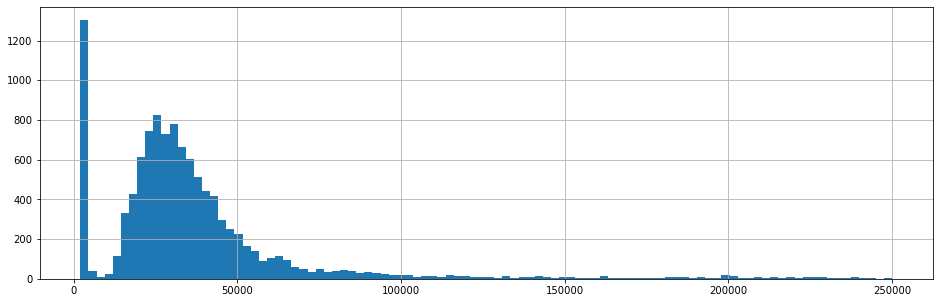

In [64]:
df[df['MSRP'] <= 250000]['MSRP'].hist(bins=100, figsize=(16, 5))

<AxesSubplot:>

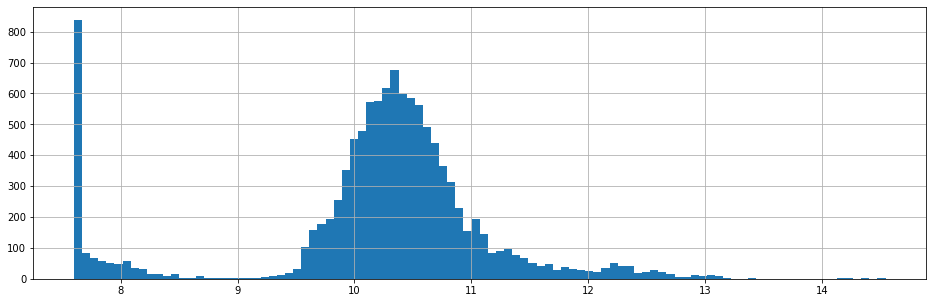

In [66]:
np.log(df['MSRP']).hist(bins=100, figsize=(16, 5))

## Gather additional insights

Our dataset contains cars from 1990 through 2017. Technological advancements have made cars increasingly (and objectively) better in many aspects over time. Cars have gotten faster. Luxury options of yesterday have become standard. Some of these phenomena, plus inflation, have also made cars cost more dollars over the years.

---

The majority of the cars in this dataset are model year 2015 or newer:

Text(0.5, 0, 'Year')

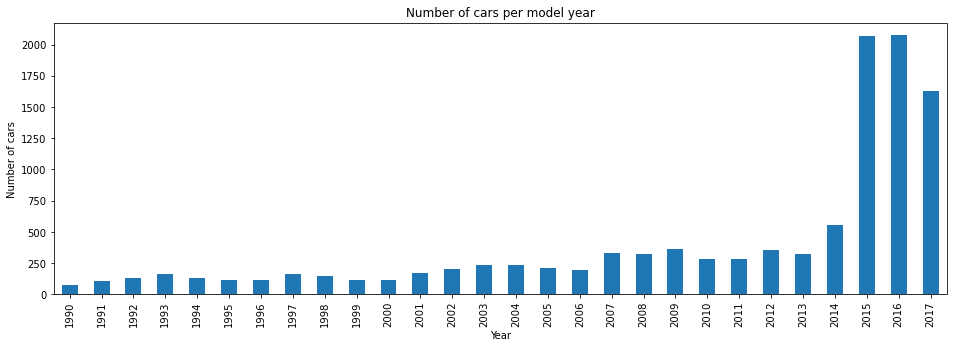

In [71]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(16,5))
plt.title("Number of cars per model year")
plt.ylabel('Number of cars')
plt.xlabel('Year')

Interestingly, the average price of cars skyrockets after the year 2000 by a significant degree. It doesn't quite seem right.

Text(0.5, 0, 'Year')

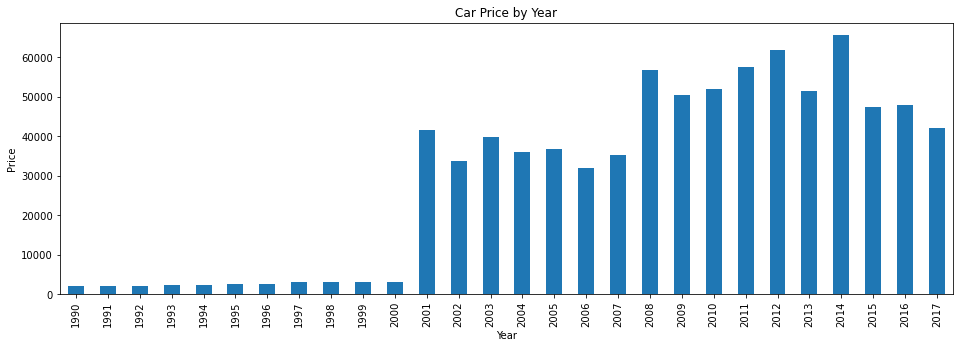

In [67]:
df.groupby('Year')['MSRP'].mean().plot(kind='bar', figsize=(16,5))
plt.title("Car Price by Year")
plt.ylabel('Price')
plt.xlabel('Year')

In [92]:
df.query('Year == 1990')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
58,Audi,200,1990,regular unleaded,162.0,5.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,20,16,3105,2000
59,Audi,200,1990,regular unleaded,162.0,5.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Wagon,22,15,3105,2000
60,Audi,200,1990,regular unleaded,162.0,5.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,23,15,3105,2000
256,Mercedes-Benz,350-Class,1990,diesel,134.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Large,Sedan,23,19,617,2144
257,Mercedes-Benz,350-Class,1990,diesel,134.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Large,Sedan,23,19,617,2098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,Volkswagen,Vanagon,1990,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
11204,Nissan,Van,1990,regular unleaded,106.0,4.0,AUTOMATIC,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,19,15,2009,2000
11205,Nissan,Van,1990,regular unleaded,106.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,20,16,2009,2000
11214,Mitsubishi,Vanwagon,1990,regular unleaded,107.0,4.0,AUTOMATIC,rear wheel drive,3.0,NaN,Compact,Passenger Minivan,19,16,436,2000


Let's also look at the number of cars we have per make, and each make's average MSRP, to get a better understanding of the cars that makeup this dataset:

Text(0.5, 0, 'Make')

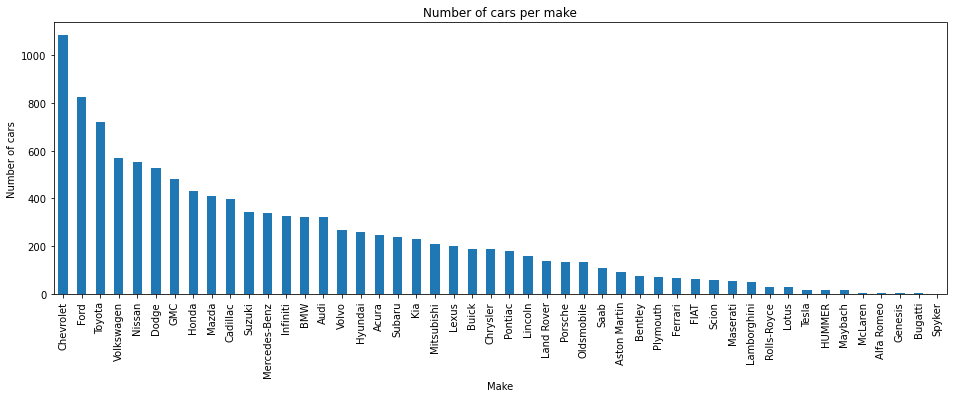

In [25]:
df['Make'].value_counts().plot(kind='bar', figsize=(16,5))
plt.title("Number of cars per make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

Text(0.5, 0, 'Make')

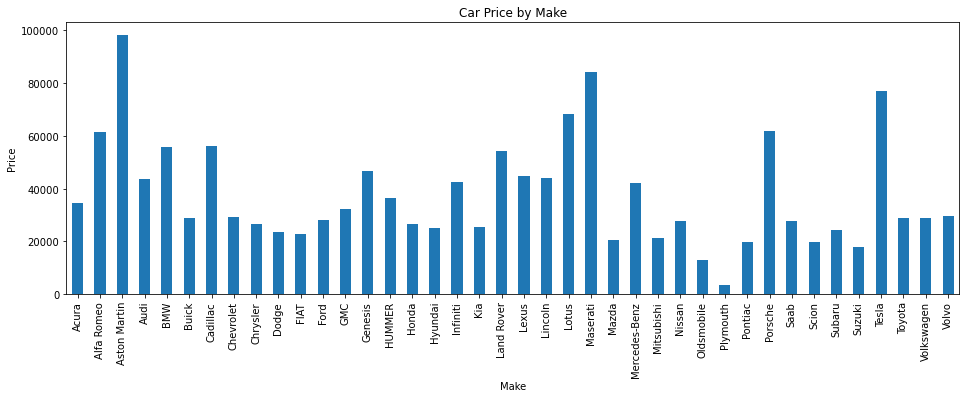

In [27]:
df[df['MSRP'] < 100000].groupby('Make')['MSRP'].mean().plot(kind='bar', figsize=(16,5))
plt.title("Car Price by Make")
plt.ylabel('Price')
plt.xlabel('Make')

Text(0.5, 0, 'Make')

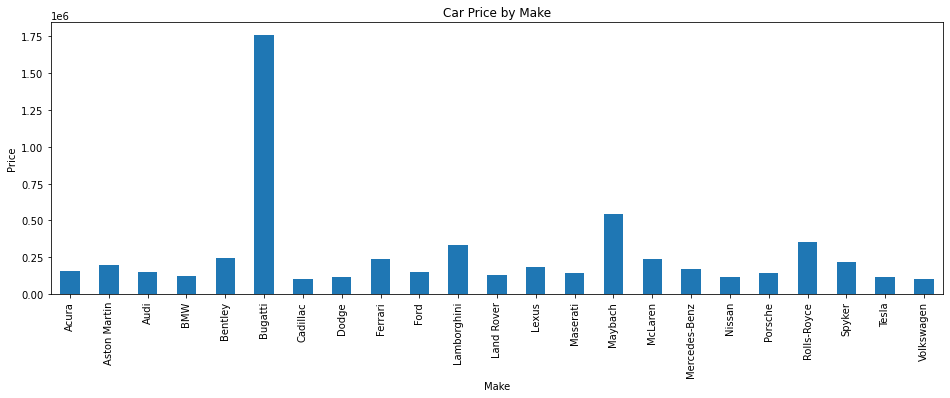

In [28]:
df[df['MSRP'] >= 100000].groupby('Make')['MSRP'].mean().plot(kind='bar', figsize=(16,5))
plt.title("Car Price by Make")
plt.ylabel('Price')
plt.xlabel('Make')

## Feature Correlation

We can calculate pairwise correlation amongst dependent variables. Some observations:
* Horsepower and number of cylinders are positively correlated, which is very expected
* Horsepower and number of cylinders have the most positive correlation with MSRP. That is, the faster, higher power cars are generally more expensive. This also makes a ton of sense.

<AxesSubplot:>

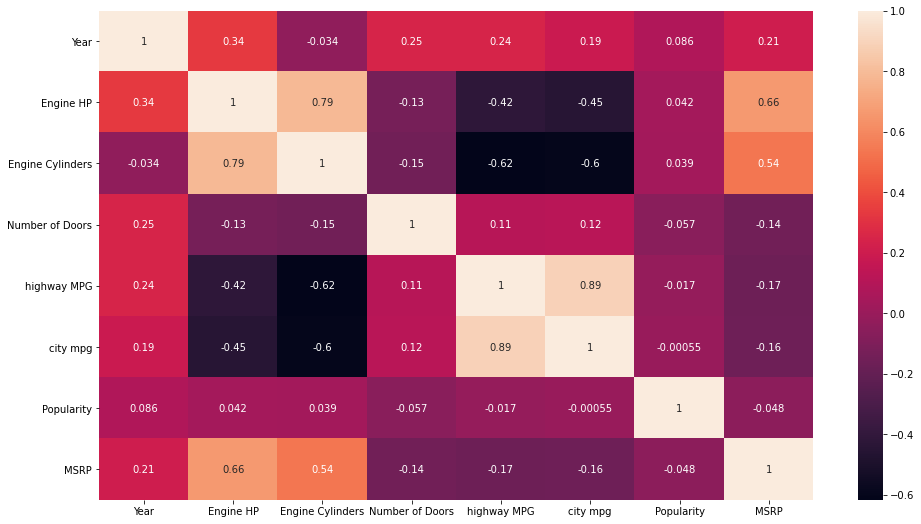

In [74]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

Higher horsepower generally means higher price:

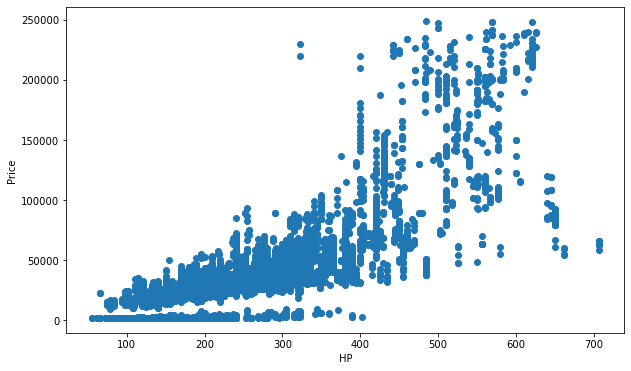

In [87]:
df_sub100k = df[df['MSRP'] < 250000]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_sub100k['Engine HP'], df_sub100k['MSRP'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

The average horsepower has also increased throughout the years due to competition amongst auto manufacturers, and advancements in technology:

Text(0.5, 0, 'Year')

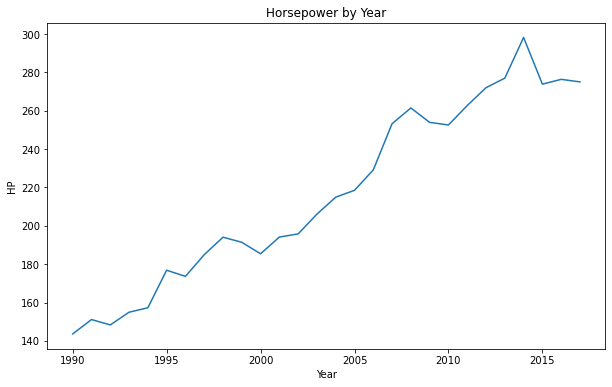

In [89]:
df.groupby('Year')['Engine HP'].mean().plot(figsize=(10, 6))
plt.title("Horsepower by Year")
plt.ylabel('HP')
plt.xlabel('Year')